In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t

In [2]:
curr_path = '/content/drive/MyDrive/Self-study/ML/melon/'
unique_songs_df = pd.read_csv(curr_path + 'melon_data/unique_songs_df_final.csv')
unique_songs_df.drop(['Unnamed: 0'], inplace = True, axis = 1)
unique_songs_df.tail(3)

,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes,debut_date,artist_type,artist_gender,artist_nationality
1894,미치도록 (Feat. 길미),1758723.0,마르코,230591.0,Music Is My Life,360193.0,1329,2007,솔로,남성,대한민국
1895,Jelly Pop,3456950.0,지피베이직,492173.0,Jelly Pop,1317388.0,286,2010,그룹,여성,대한민국
1896,실화 (원곡가수 린),3677753.0,소피야 (Sophiya),620773.0,'위대한 탄생 시즌2' 멘토스쿨 Part.6 (이선희 편),2065246.0,1448,2015.07.22,솔로,여성,영국


### Data Wrangling - Handling missing values

In [ ]:
unique_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_name           1897 non-null   object 
 1   song_id             1897 non-null   float64
 2   artist_name         1897 non-null   object 
 3   artist_id           1897 non-null   float64
 4   alb_name            1897 non-null   object 
 5   alb_id              1897 non-null   float64
 6   song_likes          1897 non-null   int64  
 7   debut_date          1891 non-null   object 
 8   artist_type         1896 non-null   object 
 9   artist_gender       1896 non-null   object 
 10  artist_nationality  1864 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 163.1+ KB


In [3]:
unique_songs_df[pd.isna(unique_songs_df['artist_type'])]

,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes,debut_date,artist_type,artist_gender,artist_nationality
809,Trouble Maker,3630755.0,트러블메이커,591031.0,Trouble Maker,2043387.0,45472,2011,NaN,NaN,대한민국


트러블메이커 is a duo so artist_type should be 'group' (그룹)

In [4]:
unique_songs_df.iloc[809,8] = '그룹'

In [ ]:
unique_songs_df[pd.isna(unique_songs_df['artist_nationality'])]

,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes,debut_date,artist_type,artist_gender,artist_nationality
225,술이 달다 (Feat. Crush),31658897.0,에픽하이 (EPIK HIGH),108356.0,sleepless in __________,10259609.0,110034,2003.10.23,그룹,남성,NaN
226,새벽에,31658898.0,에픽하이 (EPIK HIGH),108356.0,sleepless in __________,10259609.0,35693,2003.10.23,그룹,남성,NaN
227,Love Love Love (Feat. Yoong Jin Of Casker),1556553.0,에픽하이 (EPIK HIGH),108356.0,Remapping The Human Soul,342967.0,68171,2003.10.23,그룹,남성,NaN
228,In Seoul (Feat. 선우정아),31658896.0,에픽하이 (EPIK HIGH),108356.0,sleepless in __________,10259609.0,15522,2003.10.23,그룹,남성,NaN
229,Fan,1556547.0,에픽하이 (EPIK HIGH),108356.0,Remapping The Human Soul,342967.0,24598,2003.10.23,그룹,남성,NaN
230,1분 1초 (Feat. 타루),1932604.0,에픽하이 (EPIK HIGH),108356.0,Lovescream (소품집),398350.0,38414,2003.10.23,그룹,남성,NaN
231,사진첩,1110308.0,에픽하이 (EPIK HIGH),108356.0,Black Swan Songs (Repackage),313951.0,2922,2003.10.23,그룹,남성,NaN
232,비가 온대 내일도,31658900.0,에픽하이 (EPIK HIGH),108356.0,sleepless in __________,10259609.0,11870,2003.10.23,그룹,남성,NaN
233,No Different (Feat. Yuna),31658899.0,에픽하이 (EPIK HIGH),108356.0,sleepless in __________,10259609.0,10249,2003.10.23,그룹,남성,NaN
234,Lullaby For A Cat,31658901.0,에픽하이 (EPIK HIGH),108356.0,sleepless in __________,10259609.0,12995,2003.10.23,그룹,남성,NaN


all are korean artists

In [5]:
unique_songs_df['artist_nationality'] = np.where(pd.isna(unique_songs_df['artist_nationality']), '대한민국', unique_songs_df['artist_nationality'])

In [6]:
unique_songs_df[pd.isna(unique_songs_df['artist_gender'])]

,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes,debut_date,artist_type,artist_gender,artist_nationality
809,Trouble Maker,3630755.0,트러블메이커,591031.0,Trouble Maker,2043387.0,45472,2011,그룹,NaN,대한민국


The duo consists of 1 female artist and 1 male artist so the artist_gender should be 혼성 (undefined)

In [7]:
unique_songs_df.iloc[809,9] = '혼성'

debut_date also has missing values but that column is not important at this time

### Data Wrangling - Korean to English

In [8]:
unique_songs_df['artist_type'].value_counts()
#솔로: solo, 그룹: group

솔로    1125
그룹     772
Name: artist_type, dtype: int64

In [9]:
unique_songs_df['artist_type'] = np.where(unique_songs_df['artist_type'] == '솔로', 'solo', 'group')

In [10]:
unique_songs_df['artist_gender'].value_counts()
#남성: male, 여성: female, 혼성: undefined

남성    1171
여성     665
혼성      61
Name: artist_gender, dtype: int64

In [11]:
unique_songs_df.replace({'artist_gender': {'남성': 'male', '여성': 'female', '혼성': 'undefined'}}, inplace = True)

In [12]:
unique_songs_df['artist_nationality'].value_counts()
#대한민국: korean

대한민국       1768
미국           88
영국           17
캐나다          10
오스트레일리아       4
일본            4
뉴질랜드          1
중국            1
폴란드           1
아일랜드          1
프랑스           1
이탈리아          1
Name: artist_nationality, dtype: int64

In [13]:
unique_songs_df['artist_nationality'] = np.where(unique_songs_df['artist_nationality'] == '대한민국', 'korean', 'foreign')

### Data Exploring

In [14]:
unique_songs_df.head(3)

,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes,debut_date,artist_type,artist_gender,artist_nationality
0,Dynamite,32872978.0,방탄소년단,672375.0,Dynamite (DayTime Version),10479150.0,440195,2013.06.13,group,male,korean
1,Life Goes On,33077234.0,방탄소년단,672375.0,BE,10521521.0,240484,2013.06.13,group,male,korean
2,작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey),31737197.0,방탄소년단,672375.0,MAP OF THE SOUL : PERSONA,10273641.0,438387,2013.06.13,group,male,korean


In [15]:
unique_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_name           1897 non-null   object 
 1   song_id             1897 non-null   float64
 2   artist_name         1897 non-null   object 
 3   artist_id           1897 non-null   float64
 4   alb_name            1897 non-null   object 
 5   alb_id              1897 non-null   float64
 6   song_likes          1897 non-null   int64  
 7   debut_date          1891 non-null   object 
 8   artist_type         1897 non-null   object 
 9   artist_gender       1897 non-null   object 
 10  artist_nationality  1897 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 163.1+ KB


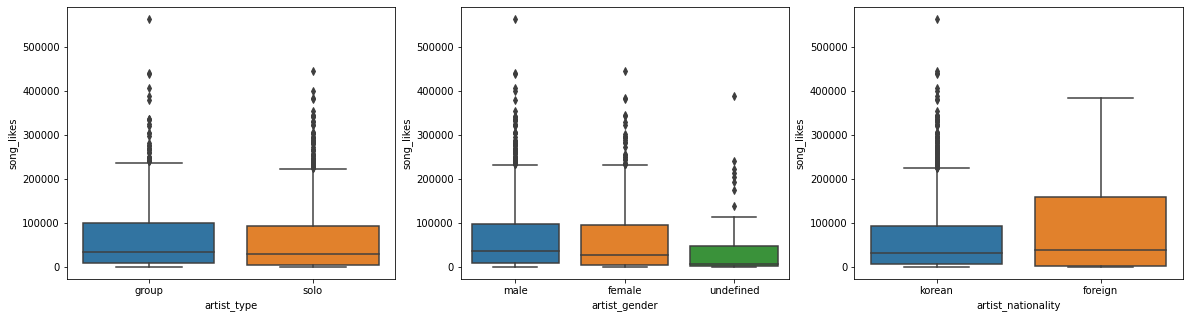

In [16]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.boxplot(x = 'artist_type', y = 'song_likes', data = unique_songs_df, ax = ax [0])
sns.boxplot(x = 'artist_gender', y = 'song_likes', data = unique_songs_df, ax = ax[1])
sns.boxplot(x = 'artist_nationality', y = 'song_likes', data = unique_songs_df, ax = ax[2])
plt.show()

- song_likes seem to have many outliers that skew the data => draw a histogram of song_likes may help. Based on the histogram, we can consider whether or not we should apply any transformation on song_likes

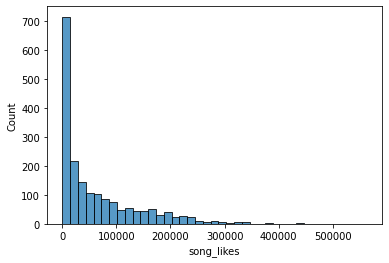

In [17]:
sns.histplot(x = 'song_likes', data = unique_songs_df)
plt.show()

Apply log transformation on song_likes


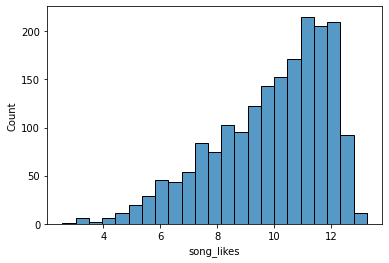

In [18]:
sns.histplot(x = np.log(unique_songs_df['song_likes']))
plt.show()

In [19]:
unique_songs_df['log_song_likes'] = np.log(unique_songs_df['song_likes'])

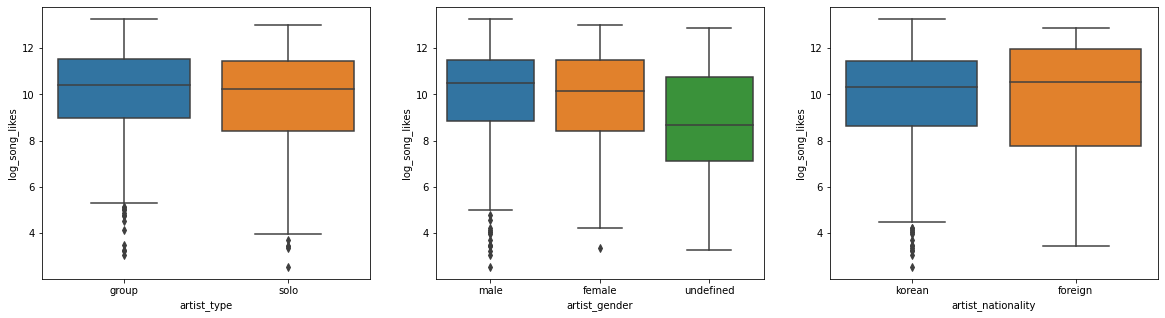

In [20]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.boxplot(x = 'artist_type', y = 'log_song_likes', data = unique_songs_df, ax = ax [0])
sns.boxplot(x = 'artist_gender', y = 'log_song_likes', data = unique_songs_df, ax = ax[1])
sns.boxplot(x = 'artist_nationality', y = 'log_song_likes', data = unique_songs_df, ax = ax[2])
plt.show()

- artist_type may not influence song_likes
- artist_nationality may influence song_likes

In [21]:
unique_songs_df['artist_nationality'].value_counts()

korean     1768
foreign     129
Name: artist_nationality, dtype: int64

## Perform Statistical tests for log_song_likes
### Group artists vs Solo artists


In [22]:
unique_songs_df['artist_type'].value_counts()

solo     1125
group     772
Name: artist_type, dtype: int64

In [23]:
group_df = unique_songs_df[unique_songs_df['artist_type'] == 'group']
solo_df = unique_songs_df[unique_songs_df['artist_type'] == 'solo']

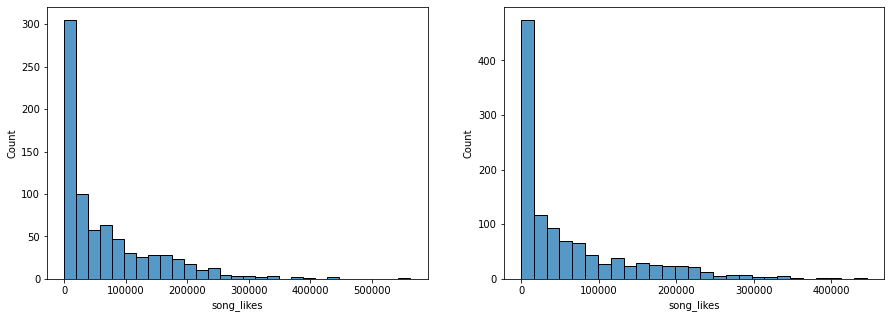

In [24]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(x = group_df['song_likes'], ax = ax[0])
sns.histplot(x = solo_df['song_likes'], ax = ax[1])
plt.show()

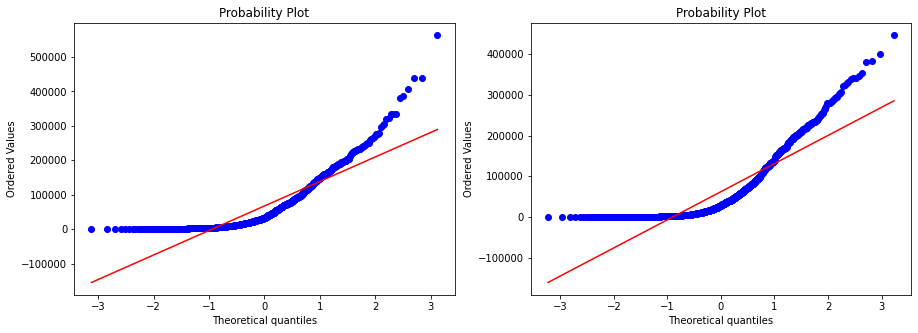

In [25]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(group_df['song_likes'], plot = ax[0])
stats.probplot(solo_df['song_likes'], plot = ax[1])
plt.show()

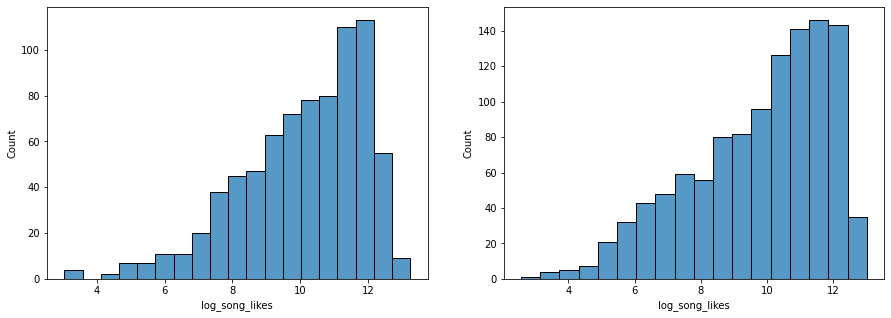

In [26]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(x = group_df['log_song_likes'], ax = ax[0])
sns.histplot(x = solo_df['log_song_likes'], ax = ax[1])
plt.show()

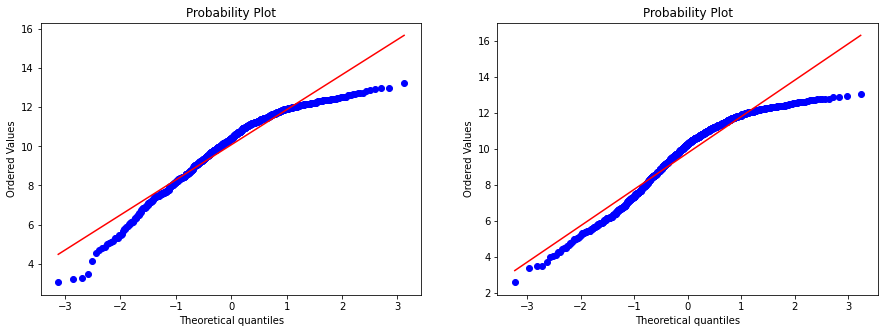

In [27]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(group_df['log_song_likes'], plot = ax[0])
stats.probplot(solo_df['log_song_likes'], plot = ax[1])
plt.show()

- H_0: True mean of log song_likes of group artists = True mean of log song_likes of solo artists
- H_a: True mean of log song_likes of group artists > True mean of log song_likes of solo artists

Here we assume that the distribution of log song_likes for each population is normal

In [28]:
def ttest(data1, data2):
    '''
    H0: True mean of data1 = true mean of data2
    Ha: True mean of data1 > true mean of data2
    significance level of 0.05
    '''
    len1, len2 = len(data1), len(data2)
    mean1, mean2 = np.mean(data1), np.mean(data2)
    se1, se2 = np.std(data1)/np.sqrt(len1), np.std(data2)/np.sqrt(len2)
    sed = np.sqrt(se1**2 + se2**2)
    t_stats = (mean1 - mean2)/sed
    df = ((se1**2 + se2**2)**2)/(se1**4/(len1-1) + se2**4/(len2-1))
    p = 1-t.cdf(t_stats,df)
    return p

In [29]:
ttest(group_df['log_song_likes'], solo_df['log_song_likes'])

0.000267930615173384

Given the p-value ~ 0 and the significance level 0.05, we have enough evidence to reject the null hypothesis and accept the alternative hypothesis that the true mean of log song_likes of group artists > true mean of log song_likes of solo artists

### Foreign artists vs Korean artists

In [30]:
unique_songs_df['artist_nationality'].value_counts()

korean     1768
foreign     129
Name: artist_nationality, dtype: int64

In [31]:
foreign_df = unique_songs_df[unique_songs_df['artist_nationality'] == 'foreign']
korean_df = unique_songs_df[unique_songs_df['artist_nationality'] == 'korean']

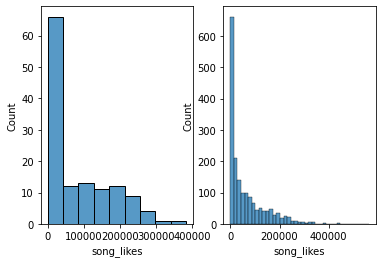

In [32]:
fig, ax = plt.subplots(1,2)
sns.histplot(x = foreign_df['song_likes'], ax = ax[0])
sns.histplot(x = korean_df['song_likes'], ax = ax[1])
plt.show()

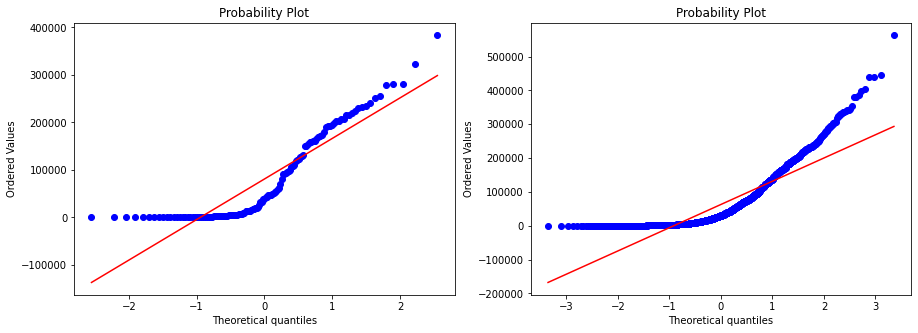

In [33]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(foreign_df['song_likes'], plot = ax[0])
stats.probplot(korean_df['song_likes'], plot = ax[1])
plt.show()

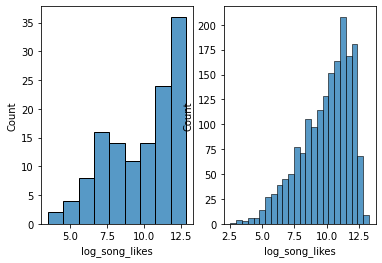

In [34]:
fig, ax = plt.subplots(1,2)
sns.histplot(x = foreign_df['log_song_likes'], ax = ax[0])
sns.histplot(x = korean_df['log_song_likes'], ax = ax[1])
plt.show()

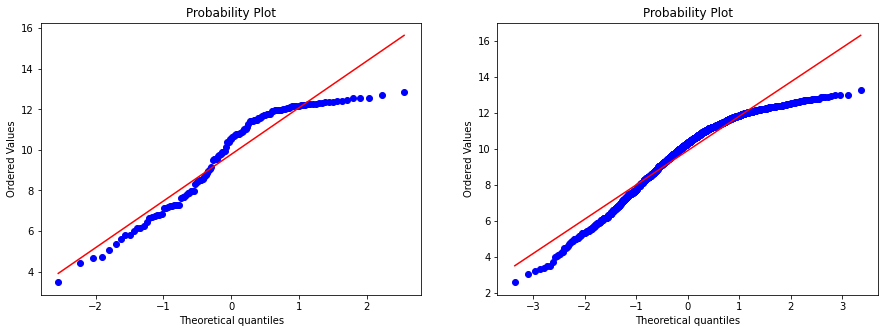

In [35]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(foreign_df['log_song_likes'], plot = ax[0])
stats.probplot(korean_df['log_song_likes'], plot = ax[1])
plt.show()

In [36]:
ttest(foreign_df['log_song_likes'], korean_df['log_song_likes'])

0.7033372696121613

Given the p-value 0.07 and the significance level 0.05, we don't have enough evidence to reject the null hypothesis that the true mean of log_song_likes of foreign artists = the true mean of log_song_likes of korean artists

### Female vs male vs undefined artists

In [37]:
unique_songs_df['artist_gender'].value_counts()

male         1171
female        665
undefined      61
Name: artist_gender, dtype: int64

In [38]:
male_df = unique_songs_df[unique_songs_df['artist_gender'] == 'male']
female_df = unique_songs_df[unique_songs_df['artist_gender'] == 'female']
undefined_df = unique_songs_df[unique_songs_df['artist_gender'] == 'undefined']

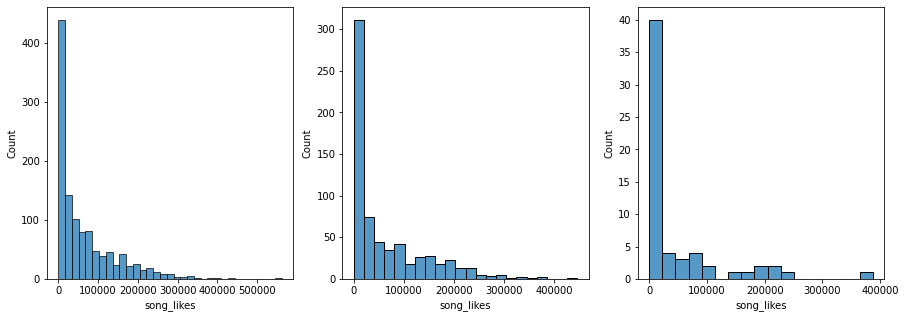

In [39]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(x = male_df['song_likes'], ax = ax[0])
sns.histplot(x = female_df['song_likes'], ax = ax[1])
sns.histplot(x = undefined_df['song_likes'], ax = ax[2])
plt.show()

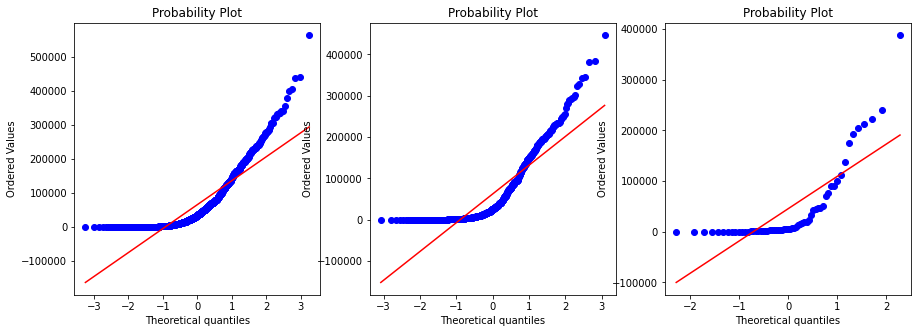

In [40]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(male_df['song_likes'], plot = ax[0])
stats.probplot(female_df['song_likes'], plot = ax[1])
stats.probplot(undefined_df['song_likes'], plot = ax[2])
plt.show()

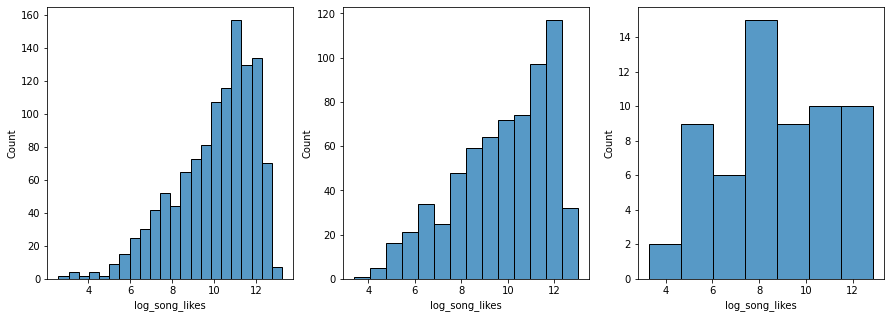

In [41]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(x = male_df['log_song_likes'], ax = ax[0])
sns.histplot(x = female_df['log_song_likes'], ax = ax[1])
sns.histplot(x = undefined_df['log_song_likes'], ax = ax[2])
plt.show()

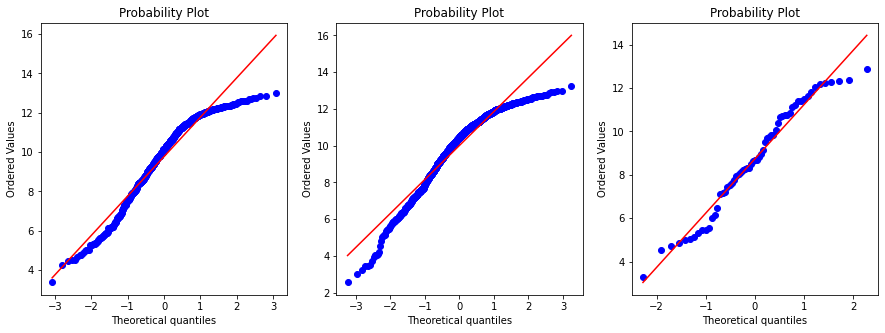

In [42]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(female_df['log_song_likes'], plot = ax[0])
stats.probplot(male_df['log_song_likes'], plot = ax[1])
stats.probplot(undefined_df['log_song_likes'], plot = ax[2])
plt.show()

ANOVA test for unequal sample sizes
- H_0: all true means are equal
- H_1: at least two of the true means are different

In [51]:
#calculate mse
sse = (np.std(male_df['log_song_likes']))**2 + (np.std(female_df['log_song_likes']))**2 + (np.std(undefined_df['log_song_likes']))
mse = sse/3
q = 3.32 #q with 95% confidence interval, 3 groups, df = 1897 - 3 = 1894


In [54]:
w_male_female = q* np.sqrt(mse/2 * (1/len(male_df['log_song_likes'])) + 1/len(female_df['log_song_likes']))
w_male_female

0.1809872646156852

In [59]:
np.mean(male_df['log_song_likes']) - np.mean(female_df['log_song_likes']) 

0.24689313498544507

0.24 > 0.18 so the true mean of log_song_likes of male artists and female artists are different

In [60]:
w_male_undefined = q* np.sqrt(mse/2 * (1/len(male_df['log_song_likes'])) + 1/len(undefined_df['log_song_likes']))
w_male_undefined

0.44370760003215653

In [61]:
np.mean(male_df['log_song_likes']) - np.mean(undefined_df['log_song_likes']) 

1.2799473498921312

1.27 > 0.44 so the true mean of log_song_likes of male artists and undefined artists are different

In [63]:
w_female_undefined = q* np.sqrt(mse/2 * (1/len(female_df['log_song_likes'])) + 1/len(undefined_df['log_song_likes']))
w_female_undefined

0.45737168893101987

In [65]:
np.mean(female_df['log_song_likes']) - np.mean(undefined_df['log_song_likes']) 

1.0330542149066861

1.03 > 0.44 so the true mean of log_song_likes of male artists and undefined artists are different

In [50]:
from scipy.stats import t
t.cdf(0.05,3,19)

0.00016042659397257964